In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
# ROOT_DIR = "/content/drive/MyDrive/1000images(changed)"

In [3]:
# def dataFolder(p, split):

#   if not os.path.exists("./"+p):
#     os.mkdir("./"+p)

#     for dir in os.listdir(ROOT_DIR):
#       os.makedirs("./"+p+"/"+dir)
#       for img in np.random.choice( a = os.listdir(os.path.join(ROOT_DIR, dir)),
#                                   size = (math.floor(split*number_of_images[dir]-5)),
#                                    replace = False):
#         O = os.path.join(ROOT_DIR, dir, img)
#         D = os.path.join("./"+p, dir)
#         shutil.copy(O,D)
#         os.remove(D)
#   else:
#     print( f"{p} Folder exists")

In [4]:
# dataFolder("train", 0.7)

In [5]:
# dataFolder("val", 0.2)

In [6]:
# dataFolder("test", 0.1)

# Model Build

In [7]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

Preparing our data

In [8]:
from keras.applications.mobilenet import preprocess_input

In [9]:
def preprocessingImages1(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,# rescale=1/255 in case of self model
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image


In [10]:
path = "train"
train_data = preprocessingImages1(path)

Found 1006 images belonging to 2 classes.


In [11]:
def preprocessingImages2(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)# rescale=1/255 in case of self model

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image

In [12]:
path = "test"
test_data = preprocessingImages2(path)

Found 58 images belonging to 2 classes.


In [13]:
path = "val"
val_data = preprocessingImages2(path)

Found 360 images belonging to 2 classes.


## MODEL TRAINING Prebuilt

In [14]:
import numpy as np
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet

In [15]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

In [16]:
for layer in base_model.layers:
  layer_trainable = False


In [17]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)


model = Model(base_model.input, X)

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 3,257,153 (12.43 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [19]:
model.compile(keras.optimizers.Adam(learning_rate=0.0001), 
              loss= keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [20]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=8, verbose=1, mode="auto")

#Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./MobileNetmodel.keras", verbose=1, save_best_only=True, mode="auto")

cd = [ mc]

Model Training

In [21]:
batch_size = 32

In [22]:
hs = model.fit(x = train_data,
                steps_per_epoch=len(train_data)//batch_size,
                epochs = 40,
                verbose=1,
                validation_data = val_data,
                validation_steps = len(val_data)//batch_size,
                callbacks=cd)

Epoch 1/40


C:\Users\kumar\Desktop\Image_Processing_Projectexhibition\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.4375 - loss: 1.2284
Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.4375 - loss: 1.2284 - val_accuracy: 0.5250 - val_loss: 1.1299
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.6429 - loss: 0.5634
Epoch 2: val_accuracy improved from 0.52500 to 0.58889, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.6429 - loss: 0.5634 - val_accuracy: 0.5889 - val_loss: 1.0495
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6875 - loss: 0.9606
Epoch 3: val_accuracy improved from 0.58889 to 0.62778, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.6875 - loss: 0.9606 - val_accuracy: 0.6278 - val_loss: 0.8356
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3438 - loss: 1.4129
Epoch 4: val_accuracy did not improve from 0.62778
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.8438 - loss: 0.4463 - val_accuracy: 0.6389 - val_loss: 0.7642
Epoch 27/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7500 - loss: 0.7047
Epoch 27: val_accuracy improved from 0.63889 to 0.67778, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.7500 - loss: 0.7047 - val_accuracy: 0.6778 - val_loss: 0.7170
Epoch 28/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7188 - loss: 0.6631
Epoch 28: val_accuracy improved from 0.67778 to 0.70833, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.7188 - loss: 0.6631 - val_accuracy: 0.7083 - val_loss: 0.6909
Epoch 29/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6875 - loss: 0.5532
Epoch 29: val_accuracy improved from 0.70833 to 0.72222, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.6875 - loss: 0.5532 - val_accuracy: 0.7222 - val_loss: 0.6899
Epoch 30/4

C:\Users\kumar\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 33: val_accuracy did not improve from 0.72500
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7250 - val_loss: 0.6681
Epoch 34/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.8438 - loss: 0.4409
Epoch 34: val_accuracy improved from 0.72500 to 0.72778, saving model to ./MobileNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.8438 - loss: 0.4409 - val_accuracy: 0.7278 - val_loss: 0.6643
Epoch 35/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8750 - loss: 0.2621
Epoch 35: val_accuracy did not improve from 0.72778
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.8750 - loss: 0.2621 - val_accuracy: 0.7278 - val_loss: 0.6593
Epoch 36/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8438 - loss: 0.4350
Epoch 36: val_accuracy did not improve from 0.72778
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.8438 - loss: 0.4350 - val_accuracy: 0.7250 - val_loss: 0.6526
Epoch 37/40
1/1 ━━━━━━━━━━━━━━━━━━━━

Graphical Interpretation

In [23]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'acc vs val-acc')

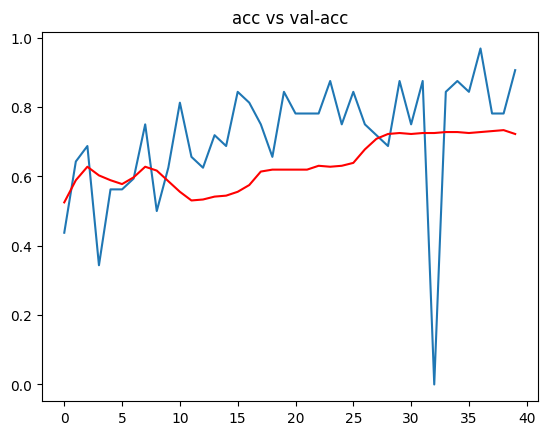

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'loss vs val-loss')

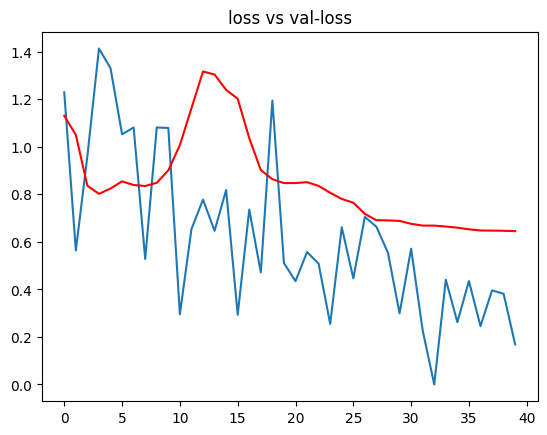

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val-loss")

In [26]:
#Model Accuracy

from keras.models import load_model

model = load_model("./MobileNetmodel.keras")

**Model Accuracy**

In [27]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 970ms/step - accuracy: 0.7766 - loss: 0.4731
the accuracy of our model is 75.86206793785095 %


In [29]:
train_data.class_indices

{'CVD': 0, 'NotCVD': 1}

In [30]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predictions:
[[0.36985272]]


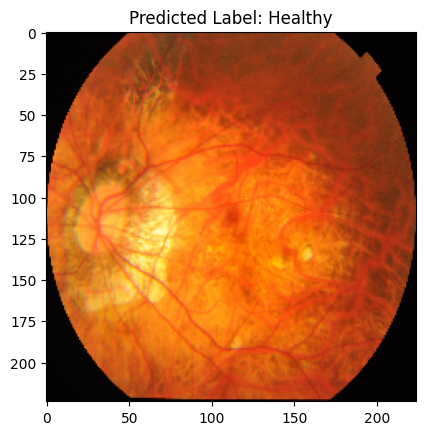

In [55]:
path = "./test/NotCVD/1ffa94f3-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(path, target_size = (224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

plt.imshow(img)

predictions = model.predict(input_arr)
predictions

# Print the predictions
print("Predictions:")
print(predictions)
# Get the predicted label
predicted_label = "Healthy" if predictions < 0.5886 else "Cardiovascular Disease"



plt.title("Predicted Label: " + predicted_label)
plt.show()